# Import библиотек

In [ ]:
import pandas as pd # Библиотека Pandas для работы с табличными данными
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации
import seaborn as sns # библиотека seaborn для визуализации
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего

# предварительная обработка числовых признаков
from sklearn.preprocessing import MinMaxScaler# Импортируем нормализацию от scikit-learn
from sklearn.preprocessing import StandardScaler # Импортируем стандартизацию от scikit-learn
from sklearn.preprocessing import PowerTransformer  # Степенное преобразование от scikit-learn
# предварительная обработка категориальных признаков
from sklearn.preprocessing import OneHotEncoder# Импортируем One-Hot Encoding от scikit-learn
from sklearn.preprocessing import OrdinalEncoder# Импортируем Порядковое кодированиеот scikit-learn

from sklearn.pipeline import Pipeline # Pipeline.Не добавить, не убавить

from sklearn.compose import ColumnTransformer # т.н. преобразователь колонок

from sklearn.base import BaseEstimator, TransformerMixin # для создания собственных преобразователей / трансформеров данных

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd # Библиотека Pandas для работы с табличными данными
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации
import seaborn as sns # библиотека seaborn для визуализации
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего

import plotly.graph_objects as go # Библиотека Plotly. Модуль "Graph Objects"
import plotly.express as px # Библиотека Plotly. Модуль "Express"

# предварительная обработка числовых признаков
from sklearn.preprocessing import MinMaxScaler# Импортируем нормализацию от scikit-learn
from sklearn.preprocessing import StandardScaler # Импортируем стандартизацию от scikit-learn
from sklearn.preprocessing import PowerTransformer  # Степенное преобразование от scikit-learn
# предварительная обработка категориальных признаков
from sklearn.preprocessing import OneHotEncoder# Импортируем One-Hot Encoding от scikit-learn
from sklearn.preprocessing import OrdinalEncoder# Импортируем Порядковое кодированиеот scikit-learn
from sklearn.preprocessing import LabelEncoder# Импортируем LabelEncoder от scikit-learn

from sklearn.pipeline import Pipeline # Pipeline.Не добавить, не убавить

from sklearn.compose import ColumnTransformer # т.н. преобразователь колонок

from sklearn.base import BaseEstimator, TransformerMixin # для создания собственных преобразователей / трансформеров данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Набор данных



In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Dataset of Diabetes .csv',delimiter=',')

In [ ]:
DF = df.drop(columns = ['ID','No_Pation'])

In [ ]:
DF.shape

(1000, 12)

In [ ]:
DF[DF['CLASS']=='Y'].shape#с диабетом


(840, 12)

In [ ]:
DF[DF['CLASS']=='N'].shape#без


(102, 12)

In [ ]:
DF[DF['CLASS']=='P'].shape#предрасположенность


(53, 12)

In [ ]:
DF['Gender'].unique()

array(['F', 'M', 'f'], dtype=object)

In [ ]:
DF['Gender'].replace('f', 'F', inplace=True)

In [ ]:
DF['Gender'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
DF.sort_values(by='Gender')

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
775,F,58,3.7,36,10.7,4.2,0.5,0.9,3.1,0.2,36.0,Y
777,F,54,9.0,70,10.8,3.7,3.1,1.2,2.0,1.4,35.0,Y
780,F,60,4.4,49,12.3,4.6,2.3,0.9,3.6,2.0,38.0,Y
395,F,54,4.3,44,7.6,5.4,2.0,1.0,3.5,0.9,27.3,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
431,M,53,5.6,72,9.0,8.8,4.3,1.5,3.5,1.2,29.0,Y
432,M,52,5.4,56,7.9,4.9,2.1,1.1,2.5,0.9,28.0,Y
433,M,61,3.0,39,9.0,3.9,0.7,0.8,2.8,0.3,30.0,Y
401,M,60,5.7,76,6.8,5.5,1.5,0.7,4.1,0.7,33.0,Y


In [ ]:
ex= pd.read_csv('/content/drive/MyDrive/diabetes_prediction_dataset.csv')

In [ ]:
ex.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
ex.shape

(100000, 9)

In [ ]:
DF.to_csv('/content/drive/MyDrive/diabetes.csv',index=False) # если хотим чтобы и индексы сохранились - пишем index = True

# Обработка\Анализ данных



Данные были собраны у иракского общества, они были получены из лаборатории городской больницы и Специализированного центра эндокринологии и диабета, клинической больницы Аль-Кинди.


---


Датасет состоит из:

Gender - пол (F/M)

AGE - возраст (от 20 до 79)

Urea - мочевина

Cr - коэффициент креатина

HbA1c - Гликированный гемоглобин

Chol - холестерин

TG - триглецириды

HDL - липопротеиды высокой плотности(лпвп)

LDL - липопротеиды низкой плотности(лпнп)

VLDL - липопротеины очень низкой плотности(лпонп)

BMI - индекс массы тела (ИМТ = вес в кг /(рост в м)^2 )

CLASS - Y=Diabetic,N= Non-Diabetic,P=Predict-Diabetic

> Предлагаю убрать предикшн




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DF=pd.read_csv('/content/drive/MyDrive/diabetes.csv',delimiter=',')

In [ ]:
DF.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  1000 non-null   object 
 1   AGE     1000 non-null   int64  
 2   Urea    1000 non-null   float64
 3   Cr      1000 non-null   int64  
 4   HbA1c   1000 non-null   float64
 5   Chol    1000 non-null   float64
 6   TG      1000 non-null   float64
 7   HDL     1000 non-null   float64
 8   LDL     1000 non-null   float64
 9   VLDL    1000 non-null   float64
 10  BMI     1000 non-null   float64
 11  CLASS   1000 non-null   object 
dtypes: float64(8), int64(2), object(2)
memory usage: 93.9+ KB


In [ ]:
DF.CLASS.unique()

array(['N', 'P', 'Y'], dtype=object)

In [ ]:
filtered_data =DF[DF['CLASS'] == 'P']
DF = DF.drop(filtered_data.index)

In [ ]:
DF.CLASS.unique()

array(['N', 'Y'], dtype=object)

In [ ]:
DF.to_csv('/content/drive/MyDrive/diabetes2.csv',index=False)

In [ ]:
DF=pd.read_csv('/content/drive/MyDrive/diabetes2.csv',delimiter=',')

In [ ]:
DF.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [ ]:
DF.describe()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,54.101373,5.159074,69.103485,8.408617,4.878691,2.362101,1.209081,2.616304,1.903485,29.893897
std,8.499612,2.975024,60.862961,2.544040,1.313356,1.417275,0.672423,1.127316,3.757012,4.869852
min,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,51.000000,3.700000,48.000000,6.800000,4.000000,1.500000,0.900000,1.800000,0.700000,27.000000
50%,55.000000,4.600000,60.000000,8.100000,4.800000,2.000000,1.100000,2.500000,1.000000,30.000000
75%,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


# Работа с данными

In [ ]:
DF=pd.read_csv('/content/drive/MyDrive/diabetes2.csv',delimiter=',')

In [ ]:
DF

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...
942,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
943,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
944,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
945,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


### Посчитаем число численных и категориальных колонок

In [ ]:
cat_columns = []
num_columns = []

for column_name in DF.columns:
    if (DF[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('categorical columns:\t ',cat_columns, '\n len = ',len(cat_columns))

print('numerical columns:\t ',  num_columns, '\n len = ',len(num_columns))



categorical columns:	  ['Gender', 'CLASS'] 
 len =  2
numerical columns:	  ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI'] 
 len =  10


# Предварительная обработка числовых признаков

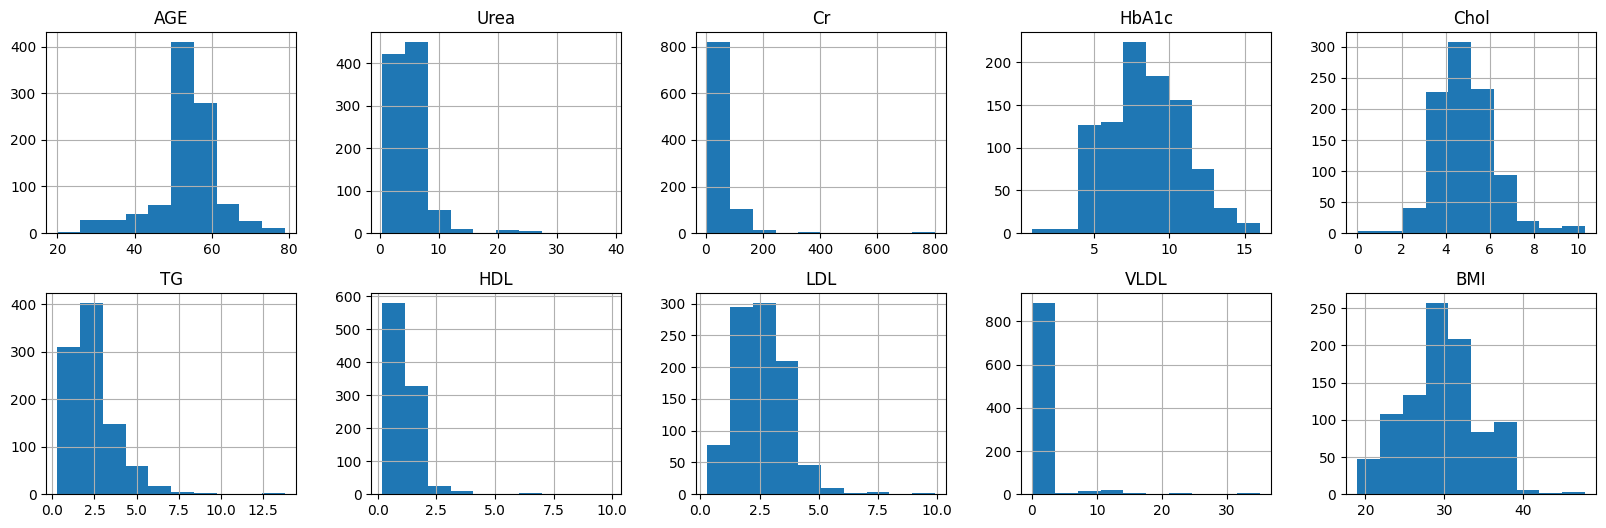

In [ ]:
fig, axs = plt.subplots(2,5,figsize=(20,  6))

DF.hist(column = num_columns, ax = axs );

Делаем вывод о том, что `AGE`, `HbA1c`, `Chol`, `LDL` и `BMI` условно нормальные, их можно просто нормировать / стандартизировать

`Urea`,`Cr`, `TG`, `HDL`, `VLDL` лучше нелинейно преобразовывать

## Стандартизация

### **Первый шаг**

создаем объект `StandardScaler()` и "обучаем" его `.fit`

Где мы сохраняем среднее значение (`mean_`) и стандартное отклонение (`scale_`) исходного набора данных

Это полезно, так как вы можете использовать те же значения для других данных в будущем

In [ ]:
scale = StandardScaler()

scale.fit(DF[num_columns]);

### **Шаг второй**

применяем трансформацию `.transform`

И пакуем результат в Dataframe

In [ ]:
scaled = scale.transform(DF[num_columns])
df_standard = pd.DataFrame(scaled, columns= num_columns)
df_standard

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,-0.482791,-0.154391,-0.379799,-1.379880,-0.517034,-1.032174,1.772020,-1.079509,-0.373762,-1.210922
1,-3.307942,-0.221653,-0.116774,-1.379880,-0.897939,-0.679198,-0.162307,-0.458236,-0.347131,-1.416375
2,-0.482791,-0.154391,-0.379799,-1.379880,-0.517034,-1.032174,1.772020,-1.079509,-0.373762,-1.210922
3,-0.482791,-0.154391,-0.379799,-1.379880,-0.517034,-1.032174,1.772020,-1.079509,-0.373762,-1.210922
4,-2.483939,0.652752,-0.379799,-1.379880,0.016234,-0.961579,-0.608690,-0.546989,-0.400392,-1.827283
...,...,...,...,...,...,...,...,...,...,...
942,1.989215,1.964358,0.458592,-0.553985,1.996942,-0.467412,-0.013512,-0.724496,-0.347131,0.021799
943,-2.719369,-0.726117,-0.149653,1.530416,-0.593215,-0.114436,-0.757485,-0.191977,3.594252,1.501065
944,-2.837083,0.652752,0.195567,-0.671970,-0.593215,-0.890983,-0.013512,-0.191977,1.650192,-0.512380
945,-1.895366,0.215549,-0.166092,-0.671970,0.320958,-0.255626,0.581665,0.251789,3.221419,2.179062


### **Шаг второй**

применяем трансформацию `.transform`

И пакуем результат в Dataframe

In [ ]:
scaled = scale.transform(DF[num_columns])
df_standard = pd.DataFrame(scaled, columns= num_columns)
df_standard

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,-0.482791,-0.154391,-0.379799,-1.379880,-0.517034,-1.032174,1.772020,-1.079509,-0.373762,-1.210922
1,-3.307942,-0.221653,-0.116774,-1.379880,-0.897939,-0.679198,-0.162307,-0.458236,-0.347131,-1.416375
2,-0.482791,-0.154391,-0.379799,-1.379880,-0.517034,-1.032174,1.772020,-1.079509,-0.373762,-1.210922
3,-0.482791,-0.154391,-0.379799,-1.379880,-0.517034,-1.032174,1.772020,-1.079509,-0.373762,-1.210922
4,-2.483939,0.652752,-0.379799,-1.379880,0.016234,-0.961579,-0.608690,-0.546989,-0.400392,-1.827283
...,...,...,...,...,...,...,...,...,...,...
942,1.989215,1.964358,0.458592,-0.553985,1.996942,-0.467412,-0.013512,-0.724496,-0.347131,0.021799
943,-2.719369,-0.726117,-0.149653,1.530416,-0.593215,-0.114436,-0.757485,-0.191977,3.594252,1.501065
944,-2.837083,0.652752,0.195567,-0.671970,-0.593215,-0.890983,-0.013512,-0.191977,1.650192,-0.512380
945,-1.895366,0.215549,-0.166092,-0.671970,0.320958,-0.255626,0.581665,0.251789,3.221419,2.179062


Визуализируем

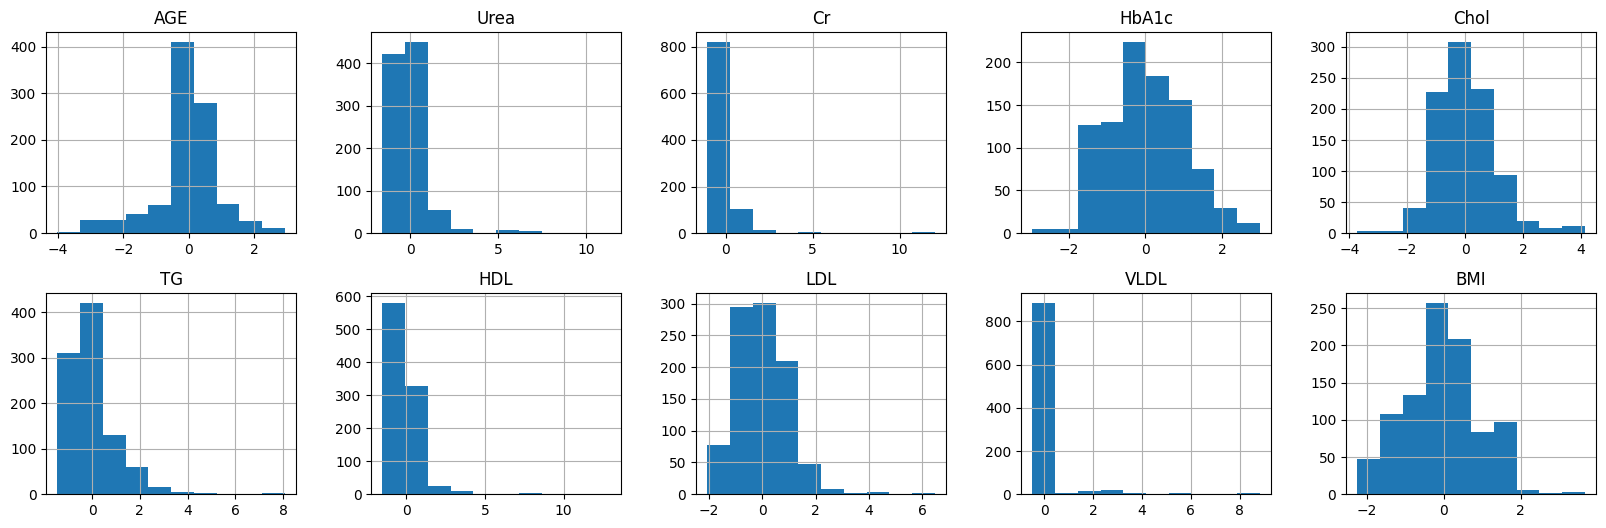

In [ ]:
df_standard.hist(figsize = (20,6), layout= (2,5));

## Нормализация

### **Первый шаг**

создаем объект `MinMaxScaler()` и "обучаем" его `.fit`

Где мы сохраняем максимальное (`data_max_`) и минимальное (`data_min_`) исходного набора данных

Это полезно, так как вы можете использовать те же значения для других данных в будущем

In [ ]:
norm = MinMaxScaler()

norm.fit(DF[num_columns]);

### **Шаг второй**

применяем трансформацию `.transform`

И пакуем результат в Dataframe

In [ ]:
normolized = norm.transform(DF[num_columns])
df_norm = pd.DataFrame(normolized, columns= num_columns)
df_norm

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,0.508475,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913
1,0.101695,0.104167,0.070529,0.264901,0.359223,0.081481,0.092784,0.187500,0.014327,0.139130
2,0.508475,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913
3,0.508475,0.109375,0.050378,0.264901,0.407767,0.044444,0.226804,0.114583,0.011461,0.173913
4,0.220339,0.171875,0.050378,0.264901,0.475728,0.051852,0.061856,0.177083,0.008596,0.069565
...,...,...,...,...,...,...,...,...,...,...
942,0.864407,0.273438,0.114610,0.403974,0.728155,0.103704,0.103093,0.156250,0.014327,0.382609
943,0.186441,0.065104,0.068010,0.754967,0.398058,0.140741,0.051546,0.218750,0.438395,0.633043
944,0.169492,0.171875,0.094458,0.384106,0.398058,0.059259,0.103093,0.218750,0.229226,0.292174
945,0.305085,0.138021,0.066751,0.384106,0.514563,0.125926,0.144330,0.270833,0.398281,0.747826


Визуализируем

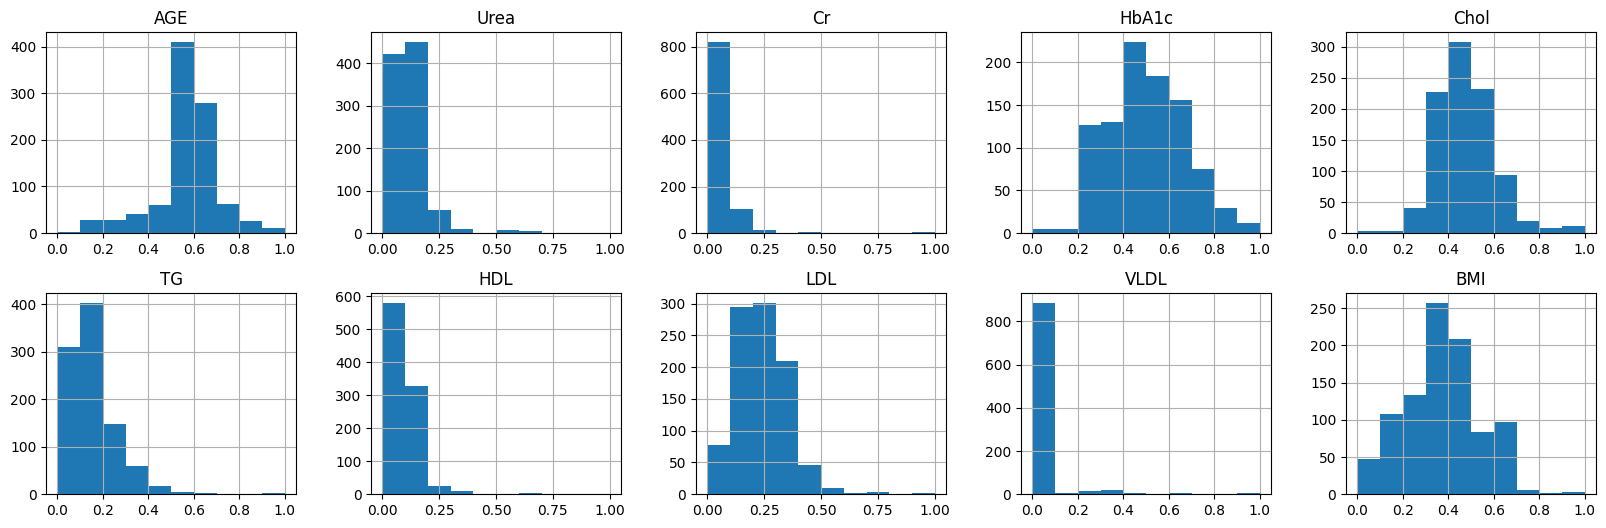

In [ ]:
df_norm.hist(figsize = (20,6), layout= (2,5));

## Степенное преобразование

### **Первый шаг**

Создание Объекта `PowerTransformer()` и его "обучение" `.fit`


In [ ]:
pt = PowerTransformer()

pt.fit(DF[num_columns]);

Коэффициенты степени преобразования

In [ ]:
pt.lambdas_

array([ 2.27278311, -0.49666806, -0.3736495 ,  0.83349945,  0.57388543,
       -0.52471423, -1.66859446,  0.07901477, -1.47458223,  0.7564717 ])

### **Шаг второй**

применяем трансформацию `.transform`

И пакуем результат в Dataframe

In [ ]:
power = pt.transform(DF[num_columns])
df_power = pd.DataFrame(power, columns= num_columns)
df_power

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,-0.594397,0.074677,-0.634978,-1.400238,-0.483868,-1.535656,1.961696,-1.186187,-1.244712,-1.219593
1,-2.547765,-0.030917,0.124000,-1.400238,-0.894676,-0.721653,0.040436,-0.363335,-0.915681,-1.436529
2,-0.594397,0.074677,-0.634978,-1.400238,-0.483868,-1.535656,1.961696,-1.186187,-1.244712,-1.219593
3,-0.594397,0.074677,-0.634978,-1.400238,-0.483868,-1.535656,1.961696,-1.186187,-1.244712,-1.219593
4,-2.133072,1.019481,-0.634978,-1.400238,0.063976,-1.348285,-0.979635,-0.469689,-1.632864,-1.877162
...,...,...,...,...,...,...,...,...,...,...
942,2.445845,1.898164,1.122377,-0.535330,1.890564,-0.347570,0.300170,-0.692571,-0.915681,0.041084
943,-2.263960,-1.059971,0.044442,1.500440,-0.564635,0.152893,-1.429722,-0.062235,2.273263,1.477851
944,-2.325639,1.019481,0.739321,-0.656320,-0.564635,-1.174678,0.300170,-0.062235,2.125869,-0.497163
945,-1.760978,0.569711,0.003306,-0.656320,0.364586,-0.031980,1.082981,0.389063,2.258281,2.113805


Визуализируем

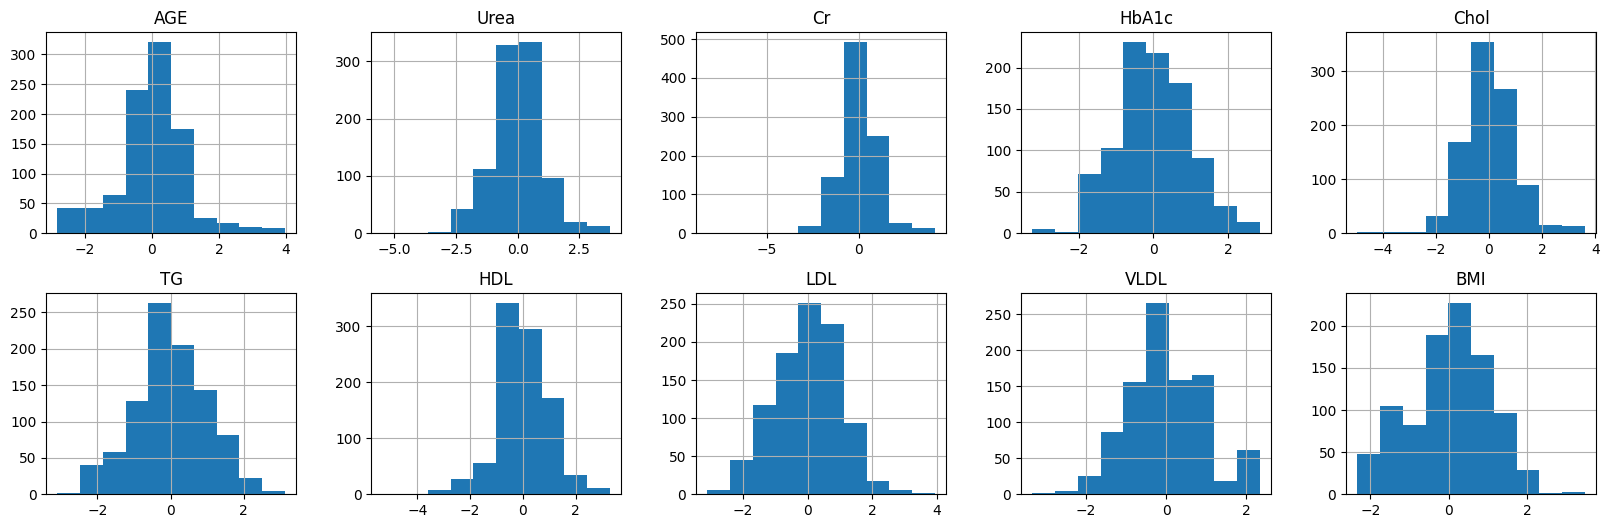

In [ ]:
df_power.hist(figsize = (20,6), layout= (2,5));

## Давайте создадим заменятель редких значений

Посмотрим на статистику числовых признаков

In [ ]:
DF.describe()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


In [ ]:
class QuantileReplacer(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.05):
        self.threshold = threshold
        self.quantiles = {}
    def fit(self, X, y=None):
        for col in X.select_dtypes(include='number'):
            low_quantile = X[col].quantile(self.threshold)
            high_quantile = X[col].quantile(1 - self.threshold)
            self.quantiles[col] = (low_quantile, high_quantile)
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in X.select_dtypes(include='number'):
            low_quantile, high_quantile = self.quantiles[col]
            rare_mask = ((X[col] < low_quantile) | (X[col] > high_quantile))
            if rare_mask.any():
                rare_values = X_copy.loc[rare_mask, col]
                replace_value = np.mean([low_quantile, high_quantile])
                if rare_values.mean() > replace_value:
                    X_copy.loc[rare_mask, col] = high_quantile
                else:
                    X_copy.loc[rare_mask, col] = low_quantile
        return X_copy

In [ ]:
qr = QuantileReplacer(threshold=0.01, )

qr.fit(DF[num_columns])

DF_num_rare = qr.transform(DF[num_columns])

In [ ]:
DF_num_rare.describe()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,53.85600,5.244143,69.490230,8.187700,4.90225,2.347410,1.207850,2.632490,1.903459,29.70233
std,8.62622,2.990525,46.002588,2.440485,1.28825,1.305545,0.520761,1.059047,3.397098,4.85019
min,30.00000,2.000000,24.000000,3.997000,2.00000,0.600000,0.500000,0.750000,0.300000,20.00000
25%,51.00000,3.700000,48.000000,6.500000,4.07500,1.500000,0.900000,1.800000,0.700000,26.00000
50%,55.00000,4.600000,60.000000,8.000000,4.80000,2.000000,1.100000,2.500000,0.950000,30.00000
75%,59.00000,5.700000,74.000000,10.000000,5.60000,2.900000,1.300000,3.300000,1.500000,33.00000
max,75.00000,20.800000,327.170000,14.500000,9.30200,7.000000,3.600000,5.600000,19.527000,39.18000


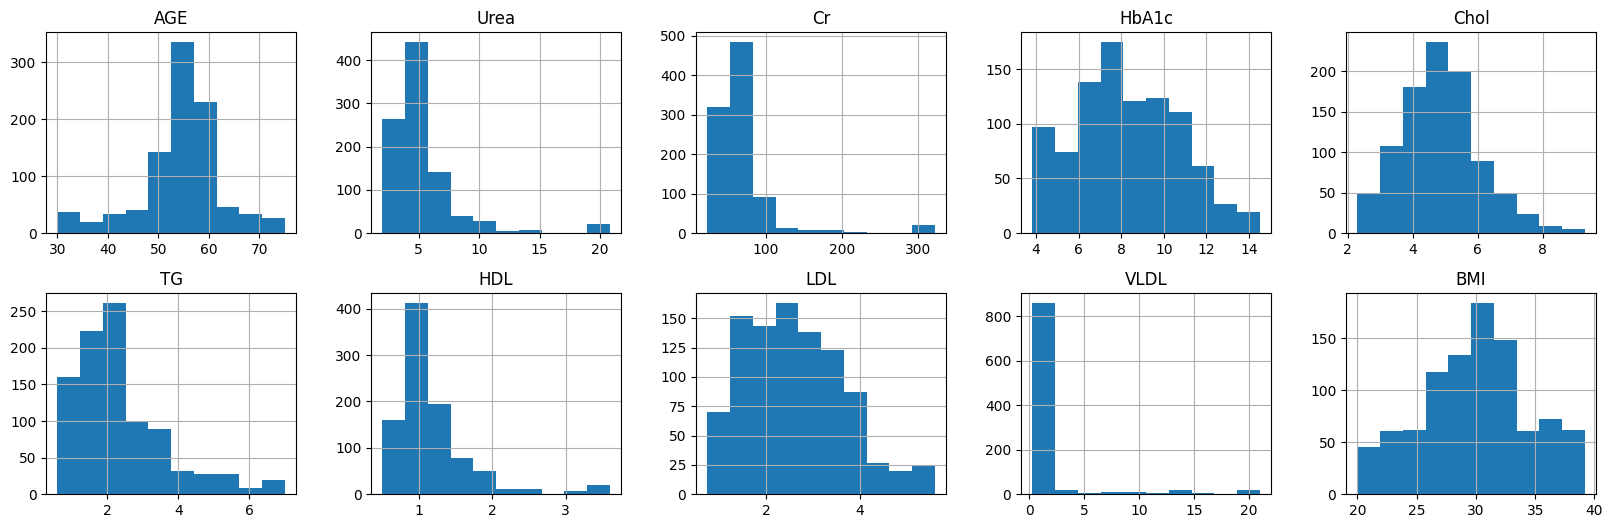

In [ ]:
DF_num_rare.hist(figsize = (20,6), layout= (2,5));

# Предварительная обработка категориальных признаков

## Порядковое кодирование

### **Первый шаг**

Создание Объекта `OrdinalEncoder()` и его "обучение" `.fit`

In [ ]:
ordinal = OrdinalEncoder()
ordinal.fit(DF[cat_columns]);

### **Шаг второй**

применяем трансформацию `.transform`

И пакуем результат в Dataframe

In [ ]:
Ordinal_encoded = ordinal.transform(DF[cat_columns])
df_ordinal = pd.DataFrame(Ordinal_encoded, columns = cat_columns)
df_ordinal

,Gender,CLASS
0,0.0,0.0
1,1.0,0.0
2,0.0,0.0
3,0.0,0.0
4,1.0,0.0
...,...,...
942,1.0,1.0
943,1.0,1.0
944,1.0,1.0
945,1.0,1.0




# Модель


In [ ]:
DF.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


age,chol, -standart

urea,cr,tg,hdl,ldl -power

hba1c,vldl,bmi -standart,power

gender,class -orfinal


In [ ]:
num_pipe_age = Pipeline([
    ('scaler', StandardScaler())
])

num_age = ['AGE']

num_pipe_chol = Pipeline([
    ('scaler', StandardScaler())
])

num_chol = ['Chol']

num_pipe_urea = Pipeline([
    ('power', PowerTransformer())
])

num_urea = ['Urea']

num_pipe_cr = Pipeline([
    ('power', PowerTransformer())
])

num_cr = ['Cr']

num_pipe_tg = Pipeline([
    ('power', PowerTransformer())
])

num_tg = ['TG']

num_pipe_hdl = Pipeline([
    ('power', PowerTransformer())
])

num_hdl = ['HDL']

num_pipe_ldl = Pipeline([
    ('power', PowerTransformer())
])

num_ldl = ['LDL']

num_pipe_vldl = Pipeline([
    ('scaler', StandardScaler()),
    ('power', PowerTransformer())
])

num_vldl = ['VLDL']

num_pipe_hba1c = Pipeline([
    ('scaler', StandardScaler()),
    ('power', PowerTransformer())
])

num_hba1c = ['HbA1c']

num_pipe_bmi = Pipeline([
    ('scaler', StandardScaler()),
    ('power', PowerTransformer())
])

num_bmi = ['BMI']

cat_pipe_gender = Pipeline([
    ('encoder', OrdinalEncoder())

])
cat_gender = ['Gender']

cat_pipe_class = Pipeline([
    ('encoder', OrdinalEncoder())

])
cat_class = ['CLASS']


# Сделаем отдельно Pipeline с числовыми признаками
preprocessors_num = ColumnTransformer(transformers=[
    ('num_age', num_pipe_age, num_age),
    ('num_chol', num_pipe_chol, num_chol),
    ('num_urea', num_pipe_urea, num_urea),
    ('num_cr', num_pipe_cr, num_cr),
    ('num_tg', num_pipe_tg, num_tg),
    ('num_hdl', num_pipe_hdl, num_hdl),
    ('num_ldl', num_pipe_ldl, num_ldl),
    ('num_vldl', num_pipe_vldl, num_vldl),
    ('num_hba1c', num_pipe_hba1c, num_hba1c),
    ('num_bmi', num_pipe_bmi, num_bmi),
])

# и Pipeline со всеми признаками
preprocessors_all = ColumnTransformer(transformers=[
    ('num_age', num_pipe_age, num_age),
    ('num_chol', num_pipe_chol, num_chol),
    ('num_urea', num_pipe_urea, num_urea),
    ('num_cr', num_pipe_cr, num_cr),
    ('num_tg', num_pipe_tg, num_tg),
    ('num_hdl', num_pipe_hdl, num_hdl),
    ('num_ldl', num_pipe_ldl, num_ldl),
    ('num_vldl', num_pipe_vldl, num_vldl),
    ('num_hba1c', num_pipe_hba1c, num_hba1c),
    ('num_bmi', num_pipe_bmi, num_bmi),
    ('cat_gender', cat_pipe_gender, cat_gender),
    ('cat_class', cat_pipe_class, cat_class),
])

In [ ]:
# объединяем названия колонок в один список (важен порядок как в ColumnTransformer)
columns_num = np.hstack([num_age,
                    num_chol,
                    num_urea,
                    num_cr,
                    num_tg,
                    num_hdl,
                    num_ldl,
                    num_vldl,
                    num_hba1c,
                    num_bmi])